In [2]:
!pip install textblob

In [3]:
!pip install tweepy


In [8]:
from textblob import TextBlob

In [9]:
import sys


In [10]:
import tweepy

In [11]:
!pip install matplotlib

In [12]:
import matplotlib.pyplot as plt

In [13]:
!pip install pandas

In [14]:
import numpy as np


In [15]:
import os

In [16]:
import nltk


In [17]:
!pip install pycountry

In [18]:
import pycountry

In [19]:
import re

In [20]:
import string

In [21]:
!pip install wordcloud

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
from PIL import Image

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [26]:
!pip install langdetect

In [27]:
from langdetect import detect


In [28]:
import pandas as pd


In [29]:
import pycountry


In [30]:
from langdetect import detect

In [31]:
from nltk.stem import SnowballStemmer

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
!pip install sklearn

In [42]:
consumerKey = "lp38LcI8P2B9BDhoFFZMGHX9h"
consumerSecret = "q3sbO1mCk2jMkBwmddM1LFTYsMY8Jbgn9QVQhazjuNvW1GPbWm"
accessToken = "1183387752-QQFUUbfm0eUJGLuOFm9odqCZQzn4iEUp203p6Va"
accessTokenSecret = "NvHdJXtoM5nPrVXAT3F8jkxMYIBRchhDCi4onvvEgrZnL"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [43]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Mpesa
Please enter how many tweets to analyze: 100


In [44]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  35
negative number:  21
neutral number:  44


In [45]:
tweet_list

,0
0,The nxt battleground is the Vaccine and poor c...
1,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...
2,RT @B_araza: Co-op bank are now charging 24 bo...
3,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...
4,"@KenyaPower_Care Hello, is something wrong wit..."
...,...
95,RT @ricky_komisch: How are people earning this...
96,"RT @I_Am_Aloyo: ""Dear Aloyo,\n\nPlease find at..."
97,@OllieMutai_ Why am I catching smoke like this...
98,"RT @nhlaka____: ""Mom can you please wake me up..."


In [46]:
tweet_list.drop_duplicates(inplace = True)

In [47]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,The nxt battleground is the Vaccine and poor c...,The nxt battleground is the Vaccine and poor c...
1,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...
2,RT @B_araza: Co-op bank are now charging 24 bo...,RT @B_araza: Co-op bank are now charging 24 bo...
3,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...
4,"@KenyaPower_Care Hello, is something wrong wit...","@KenyaPower_Care Hello, is something wrong wit..."
...,...,...
95,RT @ricky_komisch: How are people earning this...,RT @ricky_komisch: How are people earning this...
96,"RT @I_Am_Aloyo: ""Dear Aloyo,\n\nPlease find at...","RT @I_Am_Aloyo: ""Dear Aloyo,\n\nPlease find at..."
97,@OllieMutai_ Why am I catching smoke like this...,@OllieMutai_ Why am I catching smoke like this...
98,"RT @nhlaka____: ""Mom can you please wake me up...","RT @nhlaka____: ""Mom can you please wake me up..."


In [48]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(50)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,The nxt battleground is the Vaccine and poor c...,The nxt battleground is the Vaccine and poor c...,-0.400000,0.600000,negative,0.329,0.671,0.000,-0.8519
1,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,1.000000,0.300000,positive,0.000,0.833,0.167,0.4939
2,RT @B_araza: Co-op bank are now charging 24 bo...,RT @B_araza: Co-op bank are now charging 24 bo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,1.000000,0.300000,positive,0.000,0.833,0.167,0.4939
4,"@KenyaPower_Care Hello, is something wrong wit...","@KenyaPower_Care Hello, is something wrong wit...",-0.150000,0.550000,positive,0.249,0.472,0.279,-0.0772
5,"🐇 𝐇𝐚𝐩𝐩𝐲 𝐄𝐚𝐬𝐭𝐞𝐫 𝐇𝐨𝐥𝐢𝐝𝐚𝐲 \n""𝑀𝑎𝑦 𝑡ℎ𝑒 ℎ𝑜𝑝𝑒 𝑎𝑛𝑑 𝑗𝑜𝑦...","🐇 𝐇𝐚𝐩𝐩𝐲 𝐄𝐚𝐬𝐭𝐞𝐫 𝐇𝐨𝐥𝐢𝐝𝐚𝐲 \n""𝑀𝑎𝑦 𝑡ℎ𝑒 ℎ𝑜𝑝𝑒 𝑎𝑛𝑑 𝑗𝑜𝑦...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,🏁Import with the #Best Save #MORE🏁\nFollow @Ki...,1.000000,0.300000,positive,0.000,0.833,0.167,0.4939
7,CAR AIR-CONDITIONER REFILLING\n- We come to yo...,CAR AIR-CONDITIONER REFILLING\n- We come to yo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,@VodacomTanzania Kwenye menu zenu za vifurushi...,@VodacomTanzania Kwenye menu zenu za vifurushi...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,@KeEquityBank Hey..did 2 transactions from equ...,@KeEquityBank Hey..did 2 transactions from equ...,0.000000,0.000000,positive,0.000,0.809,0.191,0.5499


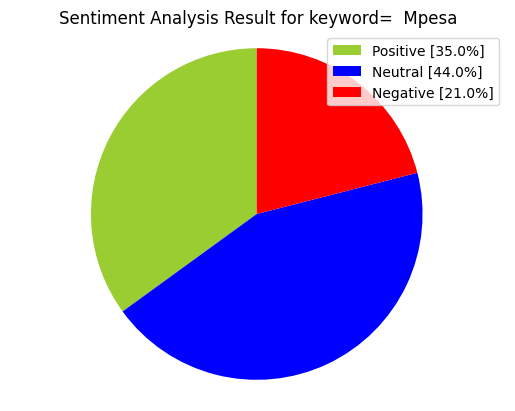

In [49]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [50]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [51]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [52]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,37,43.53
positive,34,40.00
negative,14,16.47
